In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import ncar_jobqueue
from numpy.polynomial import polynomial as P

import data_catalog
import tseries_mod
from utils import time_year_plus_frac

In [2]:
data_catalog.set_catalog('experiments')
regions = ['Global']

active catalog: experiments


In [3]:
clobber = os.environ['CLOBBER'] == 'True' if 'CLOBBER' in os.environ else False
cluster = ncar_jobqueue.NCARCluster() if clobber else None

In [4]:
def polyfit_summary(t, y):
    pf0, stats0 = P.polyfit(t, y, 0, full=True)
    pf1, stats1 = P.polyfit(t, y, 1, full=True)
    mean = pf0[0]
    slope = pf1[1]
    var_expl = 1.0 - stats1[0][0] / stats0[0][0]
    print(f'    mean={mean}, slope={slope}, variance explained={var_expl}')

def Cinv_lnd_drift_summary(experiment, varnames = ['TOTECOSYSC', 'XSMRPOOL']):
    ds_ann = tseries_mod.tseries_get_vars(varnames, 'lnd', experiment, cluster_in=cluster, freq='ann')
    for region in regions:
        y_sum = None
        for varname in varnames:
            title = ' '.join([experiment, varname, region])
            tseries_mod.tseries_plot_1ds(ds_ann, [varname], title=title, region_val=region)
            t = time_year_plus_frac(ds_ann, 'time')
            y = ds_ann[varname].sel(region=region).values
            print(f'summary for {varname}')
            polyfit_summary(t, y)
            y_sum = y if y_sum is None else y_sum + y
        # assume t from last varname is applicable
        print(f'summary for sum over vars')
        polyfit_summary(t, y_sum)

summary for TOTECOSYSC
    mean=2531.2470043945314, slope=-0.027335277365252743, variance explained=0.9664112179777882
summary for XSMRPOOL
    mean=-4.799833798408508, slope=-1.5653658869241417e-05, variance explained=0.018622313990204087
summary for sum over vars
    mean=2526.4471691894523, slope=-0.027350935419123024, variance explained=0.9665751884904368


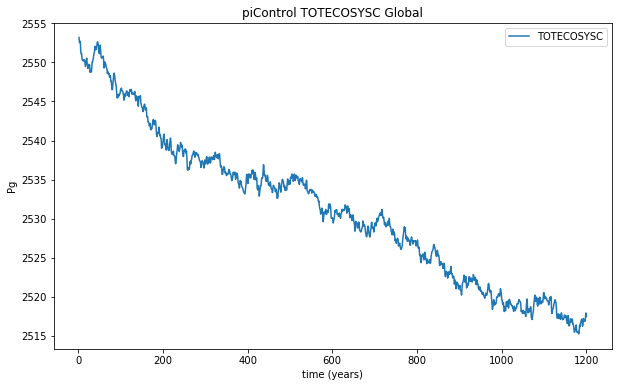

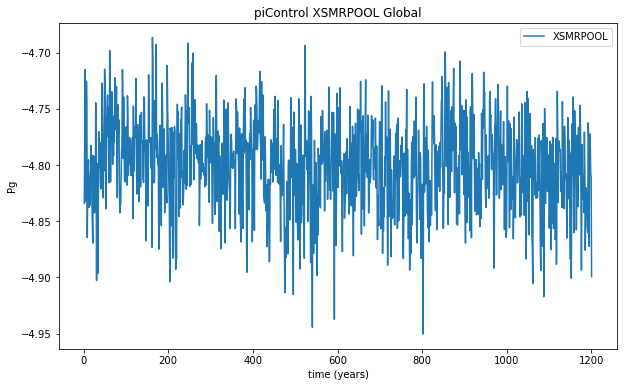

In [5]:
Cinv_lnd_drift_summary(experiment='piControl')

summary for TOTECOSYSC
    mean=2526.612015534977, slope=-0.07164543050183984, variance explained=0.92144663164225
summary for XSMRPOOL
    mean=-4.785722509892527, slope=2.701478629409975e-05, variance explained=0.009960200824804755
summary for sum over vars
    mean=2521.826287829566, slope=-0.07161842673162704, variance explained=0.921940375387502


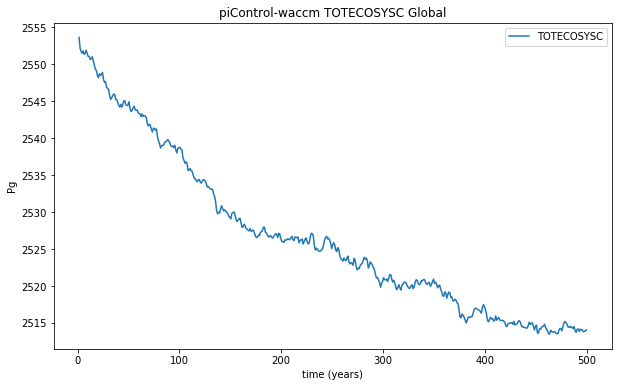

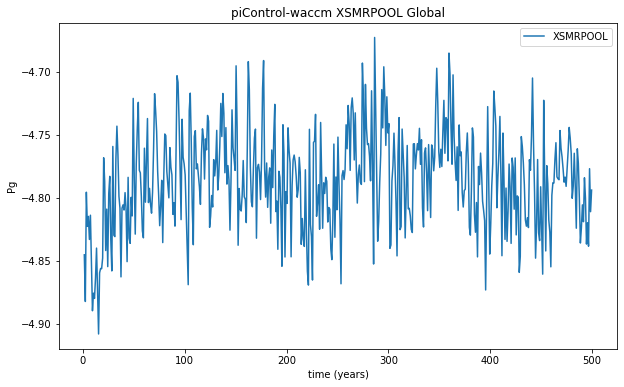

In [6]:
Cinv_lnd_drift_summary(experiment='piControl-waccm')

summary for TOTECOSYSC
    mean=2535.3768920898447, slope=-0.008253091008216919, variance explained=0.06902868711211074
summary for XSMRPOOL
    mean=-4.79842410683632, slope=-0.00036238495113679714, variance explained=0.047851011927880216
summary for sum over vars
    mean=2530.5784576416027, slope=-0.008615333081471367, variance explained=0.07657423043329192


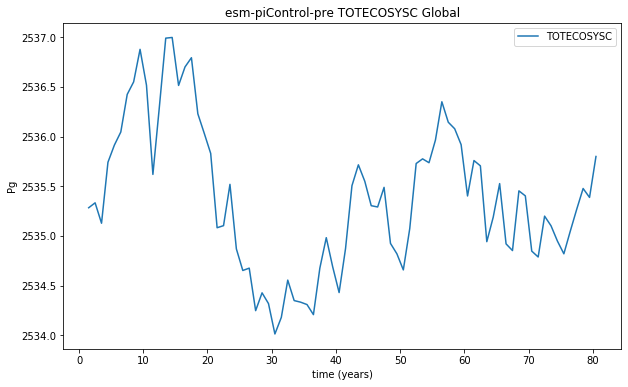

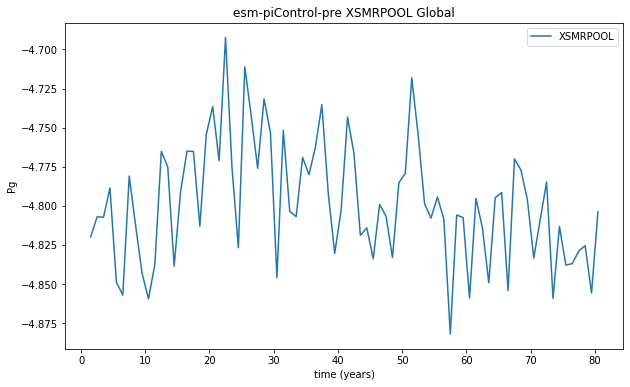

In [7]:
Cinv_lnd_drift_summary(experiment='esm-piControl-pre')

summary for TOTECOSYSC
    mean=2105.6224672851567, slope=0.0021729993147624298, variance explained=0.0693706412420283
summary for XSMRPOOL
    mean=-4.834277079582214, slope=-5.8367546640936007e-05, variance explained=0.0463265726117158
summary for sum over vars
    mean=2100.788190917968, slope=0.002114651586919092, variance explained=0.06619980747871956


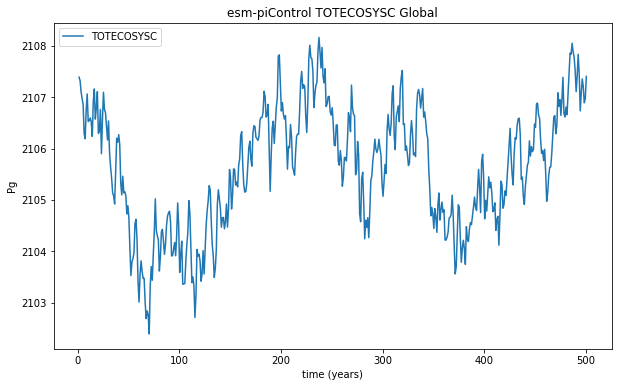

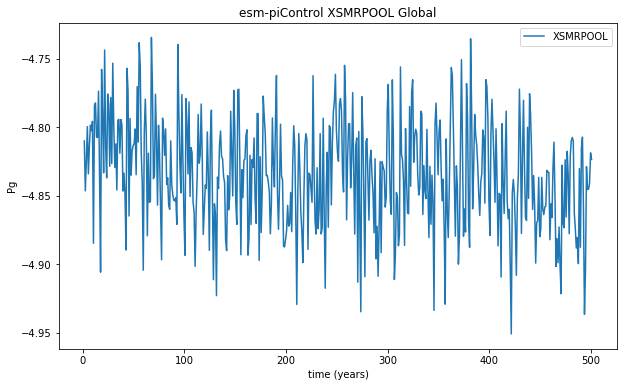

In [8]:
Cinv_lnd_drift_summary(experiment='esm-piControl')

summary for TOTECOSYSC
    mean=1174.6838078613287, slope=0.010513207485092772, variance explained=0.8232675148433699
summary for XSMRPOOL
    mean=-7.406013689041141, slope=-1.1932161307850739e-05, variance explained=0.0017787939446733958
summary for sum over vars
    mean=1167.2777944335942, slope=0.010501271304793584, variance explained=0.8268744308533676


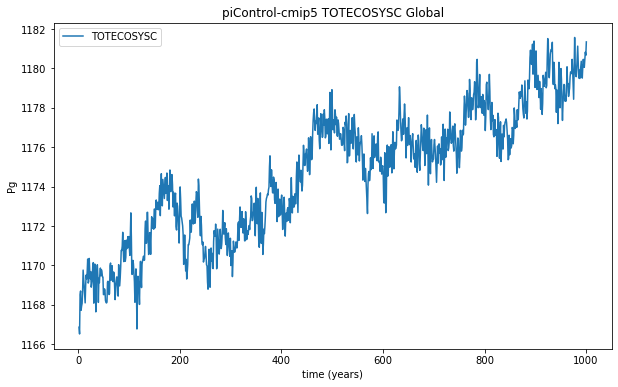

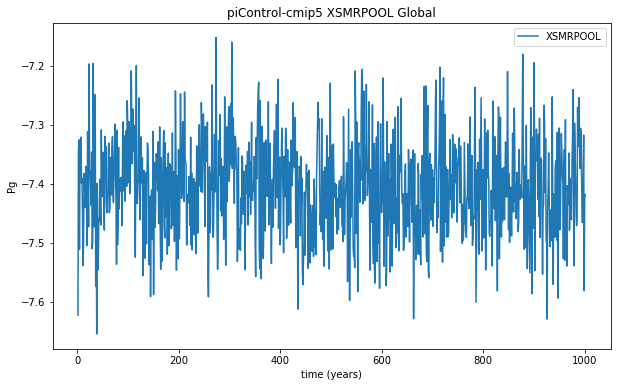

In [9]:
Cinv_lnd_drift_summary(experiment='piControl-cmip5')

summary for TOTECOSYSC
    mean=1177.7266367187508, slope=0.013319918197234683, variance explained=0.8080892698278281
summary for XSMRPOOL
    mean=-7.402136200428011, slope=-1.752800368080123e-05, variance explained=0.004204703272175592
summary for sum over vars
    mean=1170.3245012207037, slope=0.013302388474154579, variance explained=0.8094478848965179


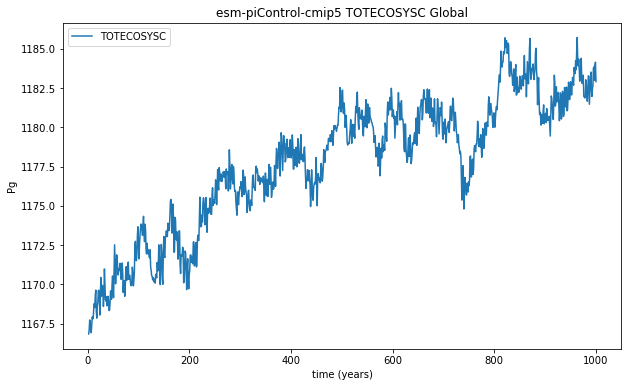

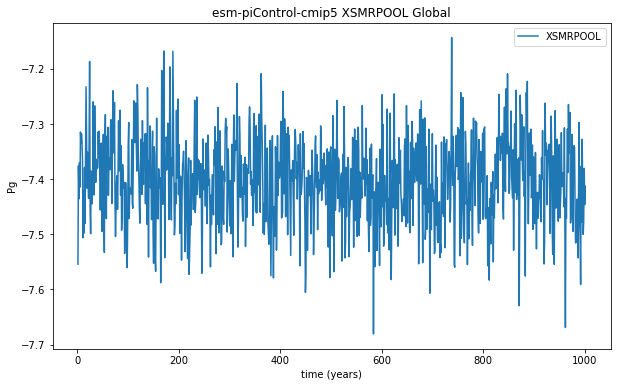

In [10]:
Cinv_lnd_drift_summary(experiment='esm-piControl-cmip5')

In [11]:
if clobber:
    cluster.close()